# NLP Playground

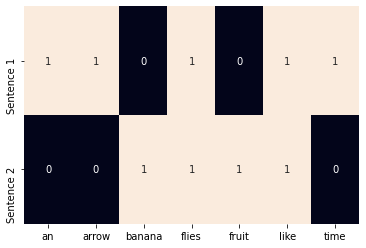

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ['Time flies flies like an arrow.',
          'Fruit flies like a banana.']

one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
vocab = one_hot_vectorizer.get_feature_names()

sns.heatmap(one_hot, annot=True,cbar=False, xticklabels=vocab,
            yticklabels=['Sentence 1','Sentence 2'])

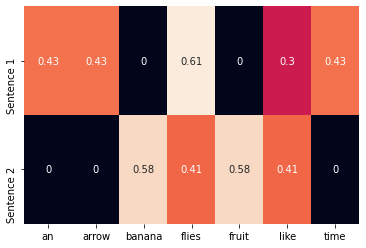

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab,
            yticklabels= ['Sentence 1', 'Sentence 2'])

#### Tokens

In [7]:
import spacy
nlp = spacy.load('en')
text = "Mary, don’t slap the green witch"
print([str(token) for token in nlp(text.lower())])

['mary', ',', 'do', 'n’t', 'slap', 'the', 'green', 'witch']


In [8]:
from nltk.tokenize import TweetTokenizer
tweet=u"Snow White and the Seven Degrees #MakeAMovieCold@midnight:­)"
tokenizer = TweetTokenizer()
print(tokenizer.tokenize(tweet.lower()))

['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makeamoviecold', '@midnight', ':', '\xad', ')']


#### Lemmas

In [9]:
import spacy
nlp = spacy.load('en')
doc = nlp(u"he was running late")
for token in doc:
  print('{} ­­> {}'.format(token, token.lemma_))

he ­­> -PRON-
was ­­> be
running ­­> run
late ­­> late


#### Activations

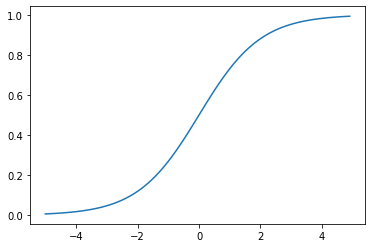

In [12]:
import torch
import matplotlib.pyplot as plt
x = torch.arange(-5,5,0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

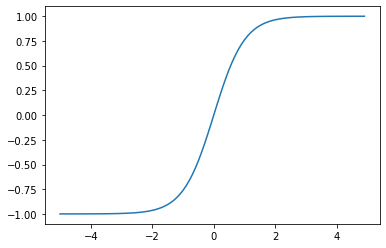

In [13]:
import torch
import matplotlib.pyplot as plt
x = torch.arange(-5,5,0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

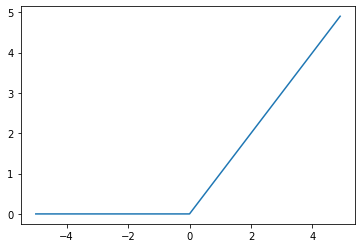

In [14]:
import torch
import matplotlib.pyplot as plt
relu = torch.nn.ReLU()
x = torch.arange(-5,5,0.1)
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

In [17]:
import torch.nn as nn
import torch
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[-0.6374, -0.8214,  0.6907]])
tensor([[0.1784, 0.1484, 0.6732]])
tensor([1.])


In [20]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

EPOCHS_TO_TRAIN = 10000

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 3, True)
        self.fc2 = nn.Linear(3, 1, True)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
inputs = list(map(lambda s: Variable(torch.Tensor([s])), [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]))
targets = list(map(lambda s: Variable(torch.Tensor([s])), [
    [0],
    [1],
    [1],
    [0]
]))


criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

print("Training loop:")
for idx in range(0, EPOCHS_TO_TRAIN):
    for input, target in zip(inputs, targets):
        optimizer.zero_grad()   # zero the gradient buffers
        output = net(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()    # Does the update
    if idx % 5000 == 0:
        print("Epoch {: >8} Loss: {}".format(idx, loss.data.numpy()))



print("")
print("Final results:")
for input, target in zip(inputs, targets):
    output = net(input)
    print("Input:[{},{}] Target:[{}] Predicted:[{}] Error:[{}]".format(
        int(input.data.numpy()[0][0]),
        int(input.data.numpy()[0][1]),
        int(target.data.numpy()[0]),
        round(float(output.data.numpy()[0]), 4),
        round(float(abs(target.data.numpy()[0] - output.data.numpy()[0])), 4)
    ))

Training loop:
Epoch        0 Loss: 0.08045198768377304
Epoch     5000 Loss: 0.2813176214694977

Final results:
Input:[0,0] Target:[0] Predicted:[0.0001] Error:[0.0001]
Input:[0,1] Target:[1] Predicted:[0.9999] Error:[0.0001]
Input:[1,0] Target:[1] Predicted:[0.9998] Error:[0.0002]
Input:[1,1] Target:[0] Predicted:[0.0002] Error:[0.0002]
